In [1]:
import sys
import qgrid
import copy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../../lib/')
from dftmanlib.pwscf import pseudo_helper
from dftmanlib.pwscf.workflow import EOSWorkflow
from dftmanlib.job import SubmitJob, submitjob_statuses, submit_status
from dftmanlib.matproj import mpquery_helper
from dftmanlib.db import load_db

from tinydb import Query

qgrid.enable()
db = load_db()
workflow_table = db.table('EOSWorkflow')
job_table = db.table('SubmitJob')

PSEUDO_TABLE = '/data/tools/shared/dftman/pseudo_table.json'
# available pseudo families:
# ['SSSP_EFFICIENCY', 'SSSP_PRECISION', 'GBRV_US_LDA',
#  'GBRV_US_PBE', 'GBRV_US_PBEsol', 'DOJO_STANDARD_LDA_NC',
#  'DOJO_STANDARD_PBE_NC', 'DOJO_STANDARD_PBEsol_NC',
#  'DOJO_STRINGENT_LDA_NC', 'DOJO_STRINGENT_PBE_NC',
#  'DOJO_STRINGENT_PBAsol_NC']
PSEUDO_FAMILY = 'GBRV_US_PBE'
MP_API_KEY = '0WqdPfXxloze6T9N'

## Materials Project Query

In [18]:
criteria = {
    'elements': 'Si',
    'nsites': 1,
    'spacegroup.number': 225,
}
properties = []
m = mpquery_helper(criteria, properties, MP_API_KEY)
m.query()
m.display()

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True}, id='da94efda-4a9a-4fd1-a5cd-3491dee55bb3', precision=5)

## EOS Workflow

### Base configuration

In [19]:
structure = m.result[0]['structure']
pseudo = pseudo_helper(structure, PSEUDO_FAMILY,
                       PSEUDO_TABLE)
base_inputs = {
        'structure': structure,

        'control': {
            'calculation': 'relax',
            'verbosity': 'high',
            'disk_io': 'none',
        },
        'system': {
            'ibrav': 0,
            'ecutwfc': 35,
            'occupations': 'smearing',
            'degauss': 0.0038,
            'smearing': 'mv',
        },
        'electrons': {
            'electron_maxstep': 500,
            'conv_thr': 1.0e-6,
        },
        'ions': {},
        'cell': {},
        'kpoints_mode': 'automatic',
        'kpoints_grid': (12, 12, 12),
        'kpoints_shift': (0, 0, 0),

        'pseudo': pseudo
    }

### Initialize and run the workflow

In [20]:
workflow = EOSWorkflow(structure, pseudo, base_inputs)
workflow_id = workflow.run()

Inserted Job 57bbff0d649a into database with doc_id 10
Submitted job runname 57bbff0d649a hash 57bbff0d649a submit id 7037007
Updated Job 57bbff0d649a in database with doc_id 10
Inserted Job 078b8cf11825 into database with doc_id 11
Submitted job runname 078b8cf11825 hash 078b8cf11825 submit id 7037008
Updated Job 078b8cf11825 in database with doc_id 11
Inserted Job 854e1ceca194 into database with doc_id 12
Submitted job runname 854e1ceca194 hash 854e1ceca194 submit id 7037009
Updated Job 854e1ceca194 in database with doc_id 12
Inserted Job 091c4a7d8ba5 into database with doc_id 13
Submitted job runname 091c4a7d8ba5 hash 091c4a7d8ba5 submit id 7037010
Updated Job 091c4a7d8ba5 in database with doc_id 13
Inserted Job c65841f6eb11 into database with doc_id 14
Submitted job runname c65841f6eb11 hash c65841f6eb11 submit id 7037011
Updated Job c65841f6eb11 in database with doc_id 14
Inserted Job 53a345208415 into database with doc_id 15
Submitted job runname 53a345208415 hash 53a345208415 su

3

### Check the status of workflow jobs

In [25]:
workflow.check_status()

Updated Job 53a345208415 in database with doc_id 15
Updated EOSWorkflow 9bd1171c5f22 in database with doc_id 3


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True}, id='13abd590-7180-4bc2-be55-ccf2132f11f7', precision=5)

### Get the workflow output

In [26]:
eos = workflow.output

Updated Job 57bbff0d649a in database with doc_id 10
Updated Job 078b8cf11825 in database with doc_id 11
Updated Job 854e1ceca194 in database with doc_id 12
Updated Job 091c4a7d8ba5 in database with doc_id 13
Updated Job c65841f6eb11 in database with doc_id 14
Updated Job 53a345208415 in database with doc_id 15
Updated Job cc10b3523b44 in database with doc_id 16
Updated Job 4654bef972e9 in database with doc_id 17


### Plot one of the EOS fits

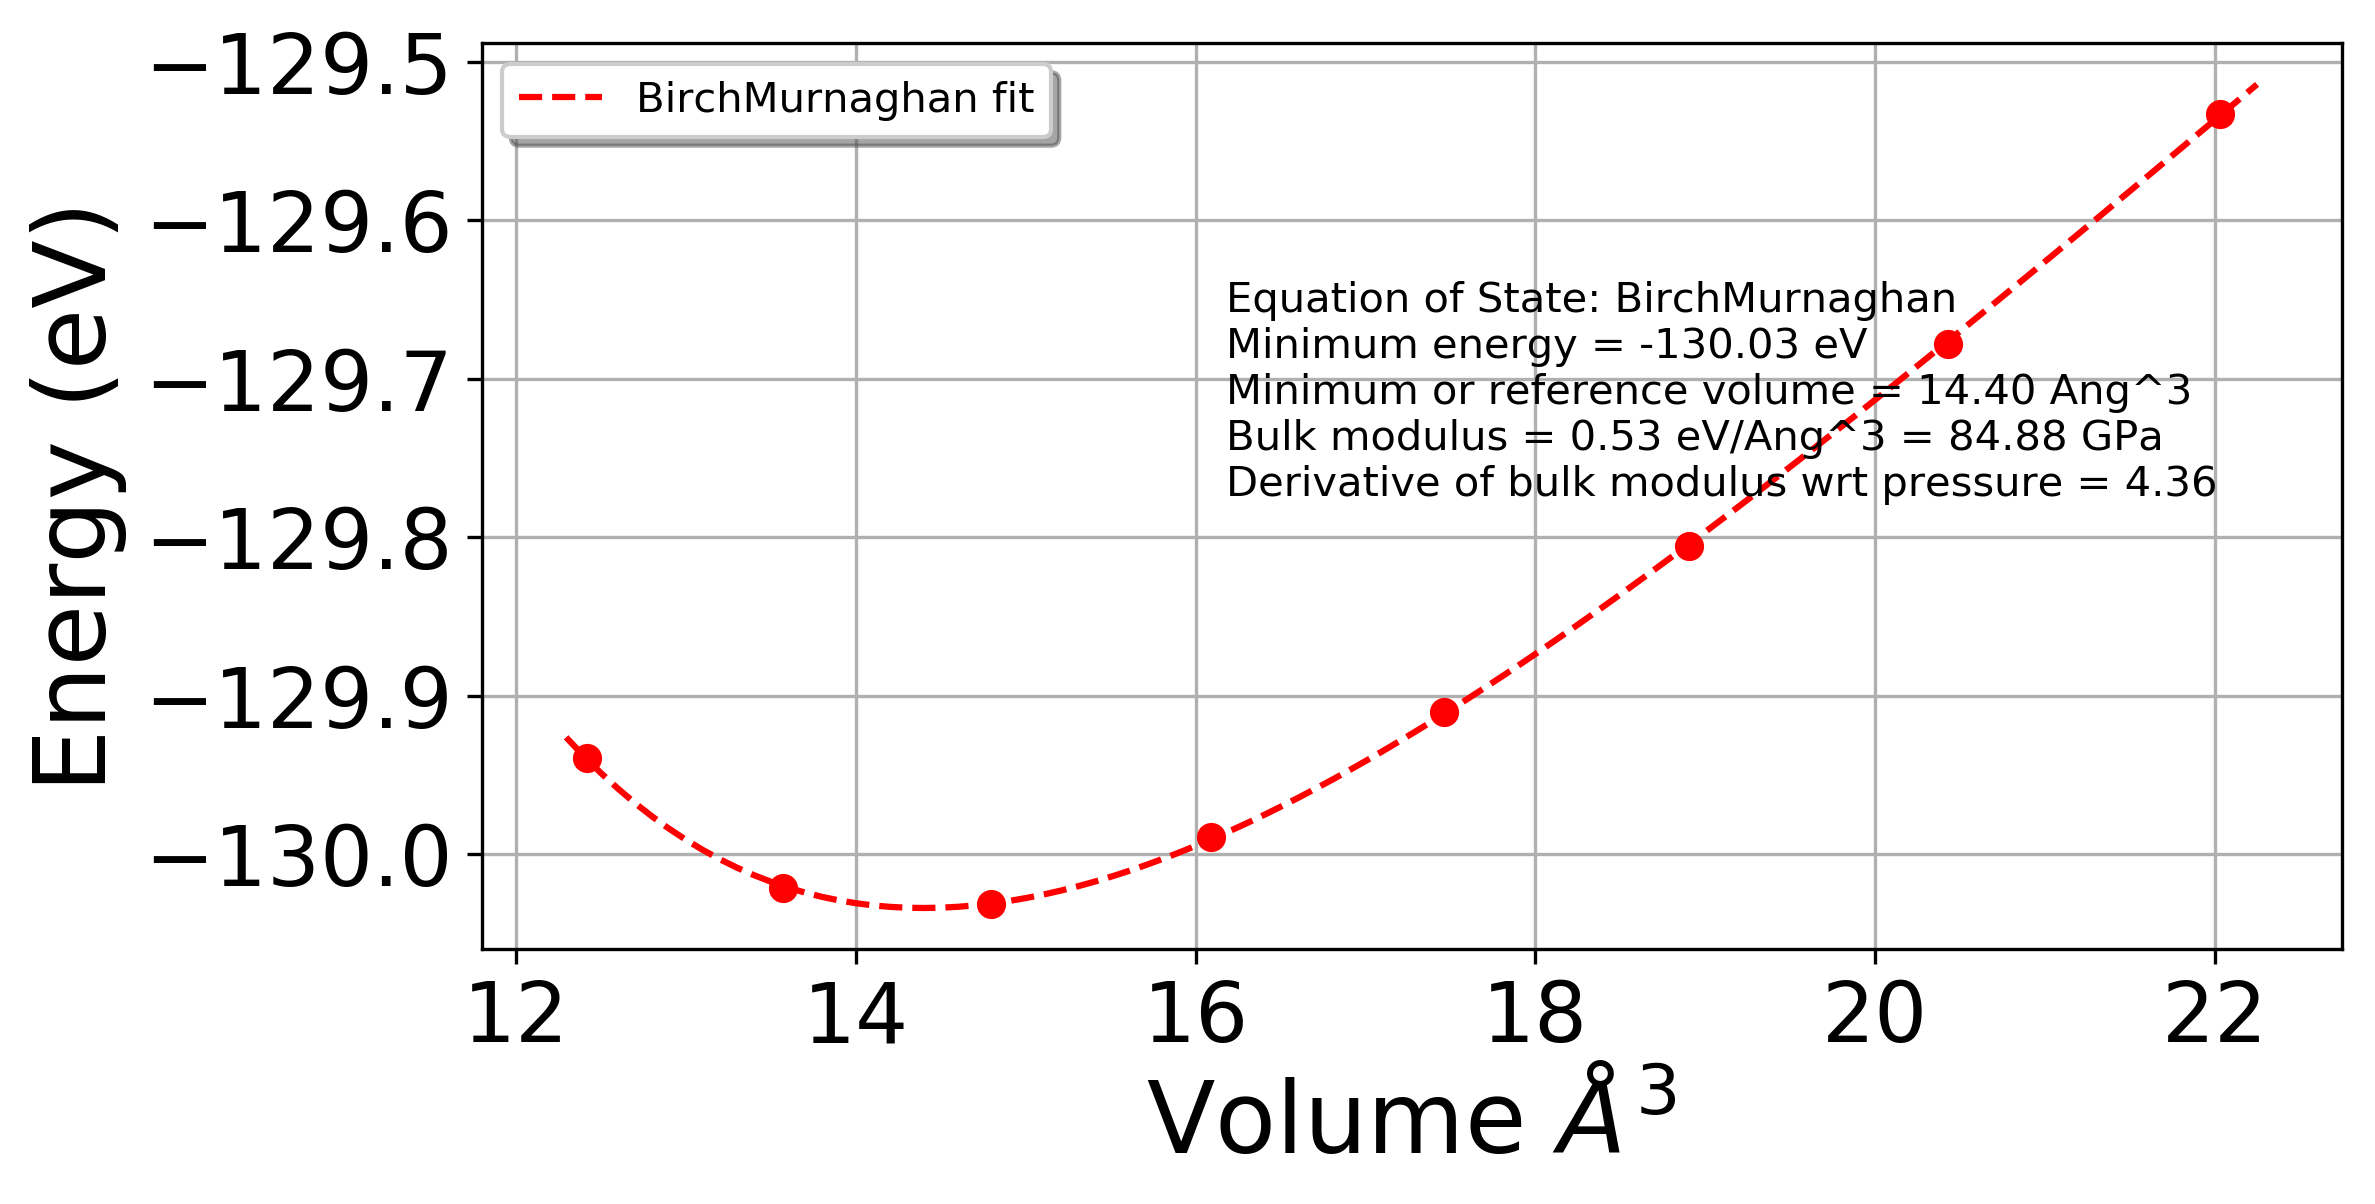

In [27]:
eos_plot = eos['birch_murnaghan'].plot()
fig = eos_plot.gcf()
fig.set_dpi(300)
plt.show()
plt.close()